In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
df = pd.read_csv('Mall_Customers.csv')
# Transform Gender to 0's and 1's
df['Gender'] = df['Gender'].map({'Male': 1, "Female": 0})
df.info()
# Data for cluster
X = df.iloc[:, -4:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [2]:
# We will create K-Means Models `iteratively between k values of 3 to 10 and at each step, capture the `Silhoutte Score` and `Inertia (Sum of Squared Distances)`
km_inertias, km_scores = [], []
for k in range(3, 10):
    km = KMeans(n_clusters=k).fit(X)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(X, km.labels_))
    print(f"Processing K-Means with k = {k}, Intertia = {km.inertia_}, Silhoutte Score = {silhouette_score(X, km.labels_)}")
km_inertias

Processing K-Means with k = 3, Intertia = 157981.67447892812, Silhoutte Score = 0.3112016998370277
Processing K-Means with k = 4, Intertia = 105299.98742210327, Silhoutte Score = 0.3921703094115865
Processing K-Means with k = 5, Intertia = 75528.58656469134, Silhoutte Score = 0.4402372958247734
Processing K-Means with k = 6, Intertia = 58385.19791162607, Silhoutte Score = 0.4506571000847437
Processing K-Means with k = 7, Intertia = 51575.57279188648, Silhoutte Score = 0.4371845592940059
Processing K-Means with k = 8, Intertia = 48317.516106442585, Silhoutte Score = 0.375245026350065
Processing K-Means with k = 9, Intertia = 41244.48735244225, Silhoutte Score = 0.3836810393812856


[157981.67447892812,
 105299.98742210327,
 75528.58656469134,
 58385.19791162607,
 51575.57279188648,
 48317.516106442585,
 41244.48735244225]

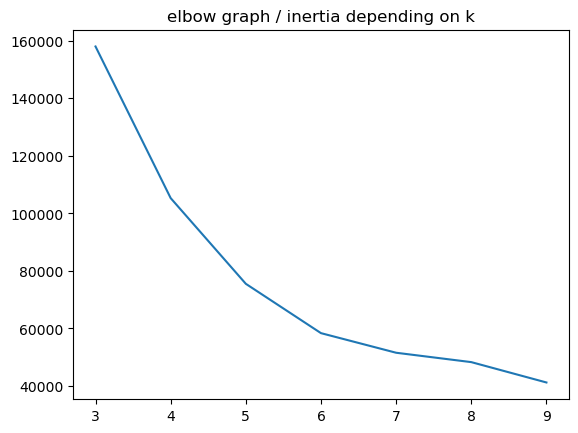

In [3]:
# sns.lineplot(range(3, 10), km_inertias) PHUOCNT
sns.lineplot(x=range(3, 10), y=km_inertias)
plt.title('elbow graph / inertia depending on k')
plt.show()

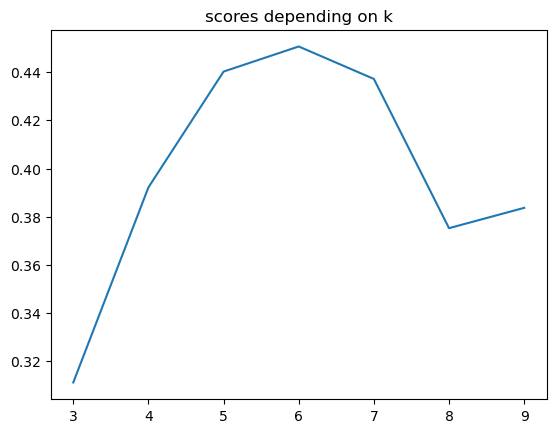

In [4]:
sns.lineplot(x=range(3, 10), y=km_scores)
plt.title('scores depending on k')
plt.show()

In [6]:
km = KMeans(n_clusters=6).fit(X)
#Assign the Cluster Labels to the Data
X['Label'] = km.labels_
#Info for each cluster
for k in range(6):
    print(f'Cluster nb : {k}')
    print(X[X.Label == k].describe().iloc[:, 1:-1])
    print('\n\n')

Cluster nb : 0
             Age  Annual Income (k$)  Spending Score (1-100)
count  23.000000           23.000000               23.000000
mean   25.521739           26.304348               78.565217
std     5.273170            7.893811               10.953729
min    18.000000           15.000000               61.000000
25%    21.500000           19.500000               73.000000
50%    24.000000           25.000000               77.000000
75%    30.000000           33.000000               84.500000
max    35.000000           39.000000               99.000000



Cluster nb : 1
             Age  Annual Income (k$)  Spending Score (1-100)
count  45.000000           45.000000               45.000000
mean   56.155556           53.377778               49.088889
std     8.543886            8.435016                6.251626
min    43.000000           38.000000               35.000000
25%    49.000000           47.000000               45.000000
50%    54.000000           54.000000               4